### Student performance Indicator

#### Lifecycle of ML project

- **Understanding the problem statement**
- **Data Collection**
- **Data checks to perform**
- **EDA (Exploratory Data Analysis)**
- **Data Preprocessing**
- **Model Training**
- **Choose Best Model**


#### 1) Problem statement

This project understands how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test Preparation Course.

#### 2) Data Collection

Data consists of 8 column and 1000 rows

In [98]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Import CSV Data as Pandas Dataframe

In [99]:
df = pd.read_csv("StudentsPerformance.csv")

In [100]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [101]:
df.shape

(1000, 8)

#### 3) Data checks to perform

- **Check missing values**
- **Check Duplicates**
- **Check Datatype**
- **Check the no of unique values in the column**
- **Check statistics of the dataset**
- **Check various categories present in the different categorical column**


3.1) Check missing values

In [102]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

3.2) Check Duplicates

In [103]:
df.duplicated().sum()

0

there are no duplicate values in the dataset

3.3) Check DataTypes

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4) Checking the number of unique values of each column

In [105]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5) Check Statistics of Dataset

In [106]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

- From above description of numerical data, all means are very close to each other-between 66 and 68.05
- All standard deviations are also close- between 14.6 and 15.19
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading higher = 17

#### 3.6) Exploring Data

In [107]:
print("categories in gender variables:", end="")
print(df['gender'].unique())
print("categories in race/ethnicity variables:", end="")
print(df['race/ethnicity'].unique())
print("categories in parental level of education variables:", end="")
print(df['parental level of education'].unique())
print("categories in lunch variables:", end="")
print(df['lunch'].unique())
print("categories in test preparation course variables:", end="")
print(df['test preparation course'].unique())
print("categories in math score variables:", end="")
print(df['math score'].unique())
print("categories in reading score variables:", end="")
print(df['reading score'].unique())
print("categories in writing score variables:", end="")
print(df['writing score'].unique())


categories in gender variables:['female' 'male']
categories in race/ethnicity variables:['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education variables:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variables:['standard' 'free/reduced']
categories in test preparation course variables:['none' 'completed']
categories in math score variables:[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
categories in reading score variables:[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  

Define numerical and categorical columns

In [108]:
numeric_features = [i for i in df.columns if df[i].dtype !='O']
categorical_features = [i for i in df.columns if df[i].dtype =='O']

#print columns
print("we have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("we have {} categorical features : {}".format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math score', 'reading score', 'writing score']
we have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding columns for total_score and average

In [109]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [110]:
reading_full = df[df['reading score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()

print(f"Number of students with full marks in Reading: {reading_full}")
print(f"Number of students with full marks in math: {math_full}")
print(f"Number of students with full marks in writing: {writing_full}")

Number of students with full marks in Reading: 17
Number of students with full marks in math: 7
Number of students with full marks in writing: 14


In [111]:
reading_full = df[df['reading score']<=20]['average'].count()
math_full = df[df['math score']<=20]['average'].count()
writing_full = df[df['writing score']<=20]['average'].count()

print(f"Number of students with less than 20 marks in Reading: {reading_full}")
print(f"Number of students with less than 20 marks in math: {math_full}")
print(f"Number of students with less than 20 marks in writing: {writing_full}")

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in math: 4
Number of students with less than 20 marks in writing: 3


Insights

- from above scores we get students have performed worst in maths 
- Best performance is in reading section.

### Visualization (Exploring Data)

#### Visualize average score distribution to make some conclusion.

- histogram
- Kernal Distribution Function

### Histogram and KDE

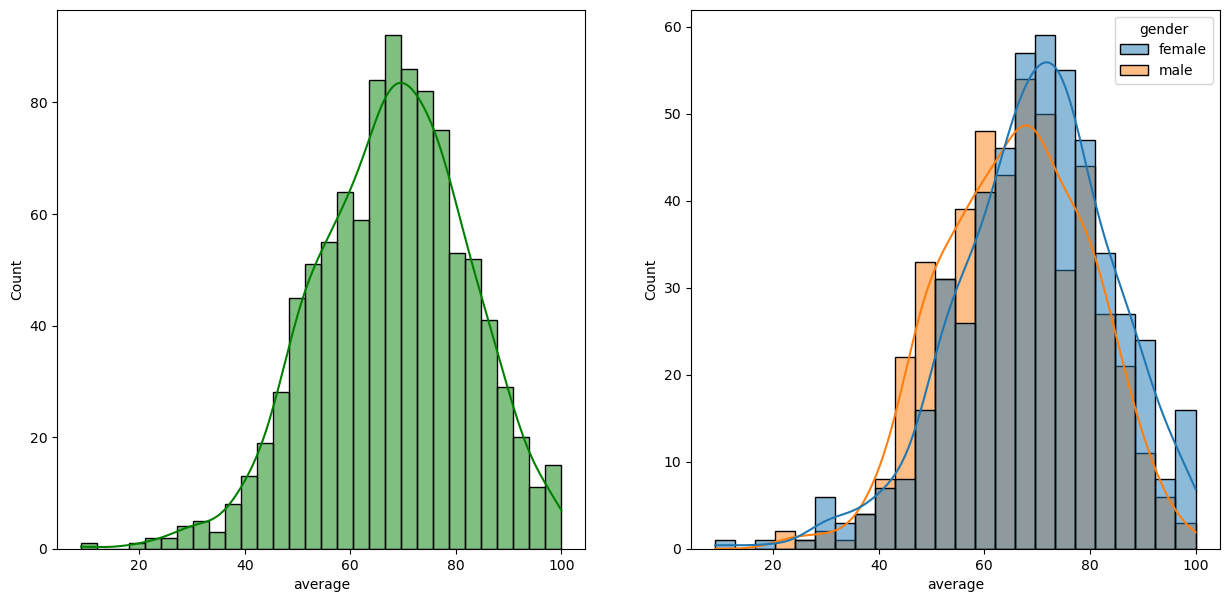

In [112]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average',kde=True, hue='gender')
plt.show()

Female students performed well than the male students

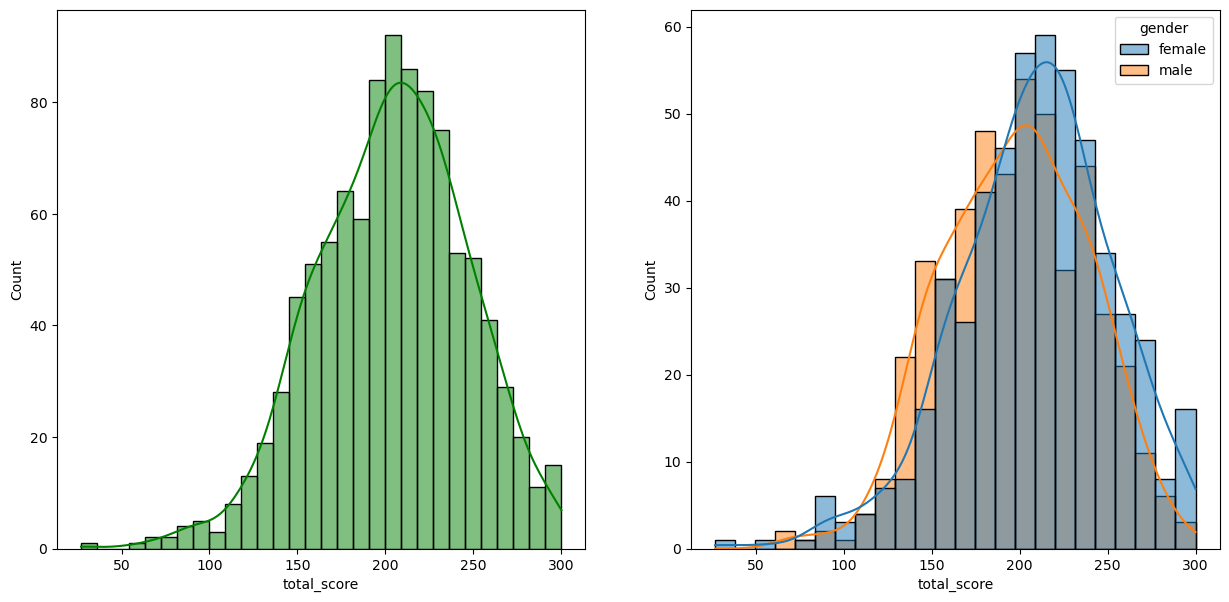

In [113]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score',kde=True, hue='gender')
plt.show()

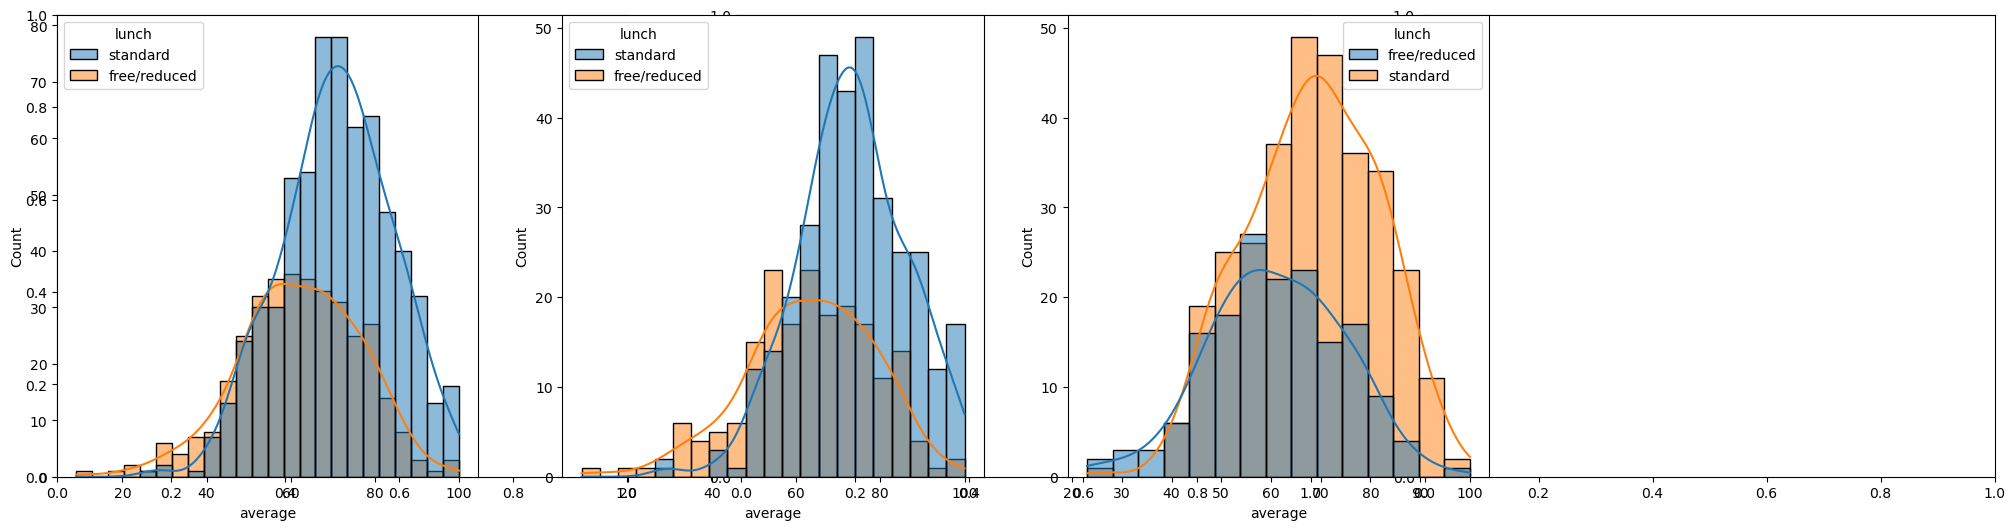

In [114]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, hue='lunch',kde=True, x='average')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',hue='lunch',kde=True)
plt.show()

standard lunch performs well in exams be it a male or female

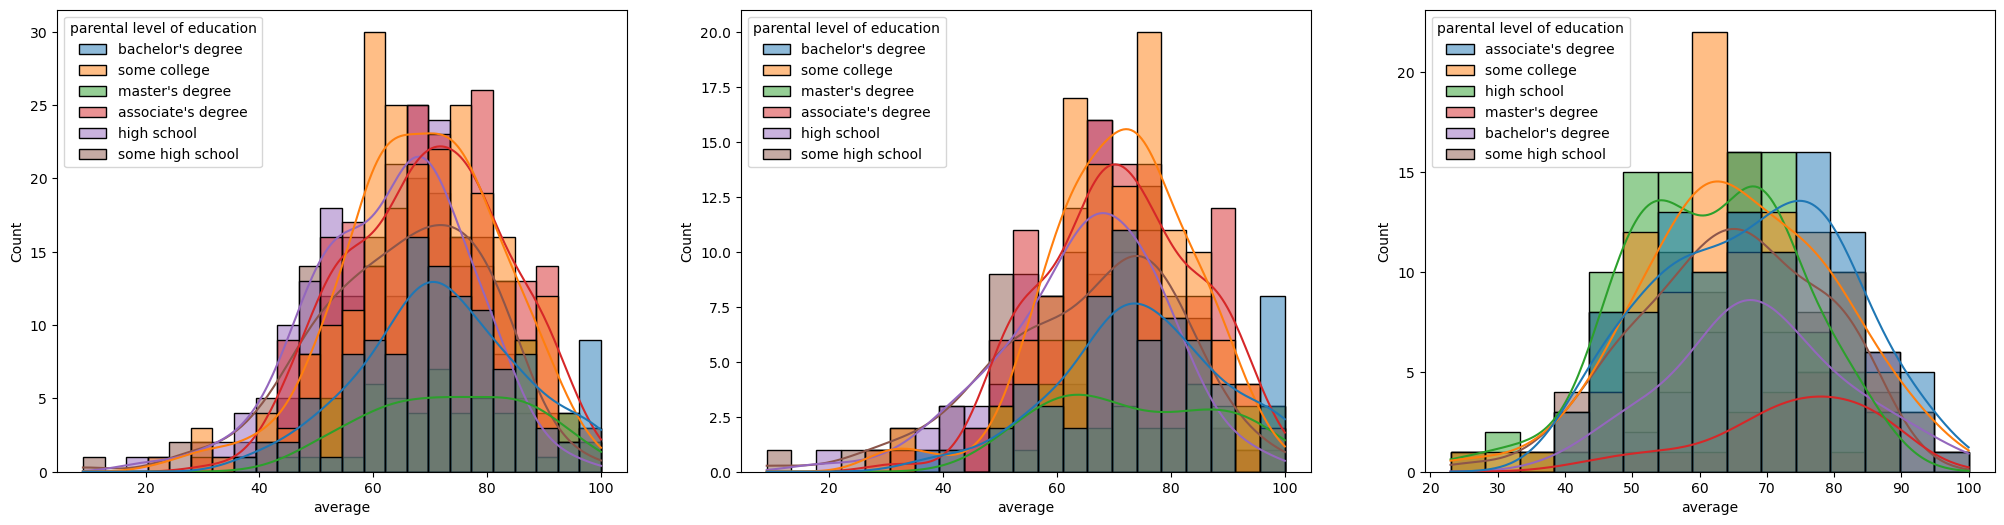

In [115]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data = df, hue='parental level of education',kde=True, x='average')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',hue='parental level of education',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',hue='parental level of education',kde=True)
plt.show()

### Model Training

In [116]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import warnings
from xgboost import XGBRegressor

In [117]:
#
# %pip install xgboost

Import CSV data as Pandas DataFrame

In [118]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparaing X and Y variables

In [119]:
X =df.drop(columns=['math score'], axis=1)
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [120]:
Y = df['math score']
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

Perform One Hot Encoding

Create a Pipeline

In [121]:
#Create column Transformer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('OneHotEncoder',oh_transformer,cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])


In [122]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

Separate dataset into train and test

In [124]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, x_test.shape

((800, 19), (200, 19))